In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



df = pd.read_csv("Automobile_data.csv" )

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [10]:
print("\nValores nulos por columna antes del tratamiento:")
df.replace('?', np.nan, inplace=True)
print(df.isnull().sum())


Valores nulos por columna antes del tratamiento:
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [7]:
# Paso 5: Identificación y tratamiento de outliers
# Identificar outliers usando el rango intercuartil (IQR)
outliers = {}
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"{col}: {outliers[col]}")

symboling: 0
normalized-losses: 1
wheel-base: 3
length: 1
width: 8
height: 0
curb-weight: 0
engine-size: 10
compression-ratio: 28
city-mpg: 2
highway-mpg: 3


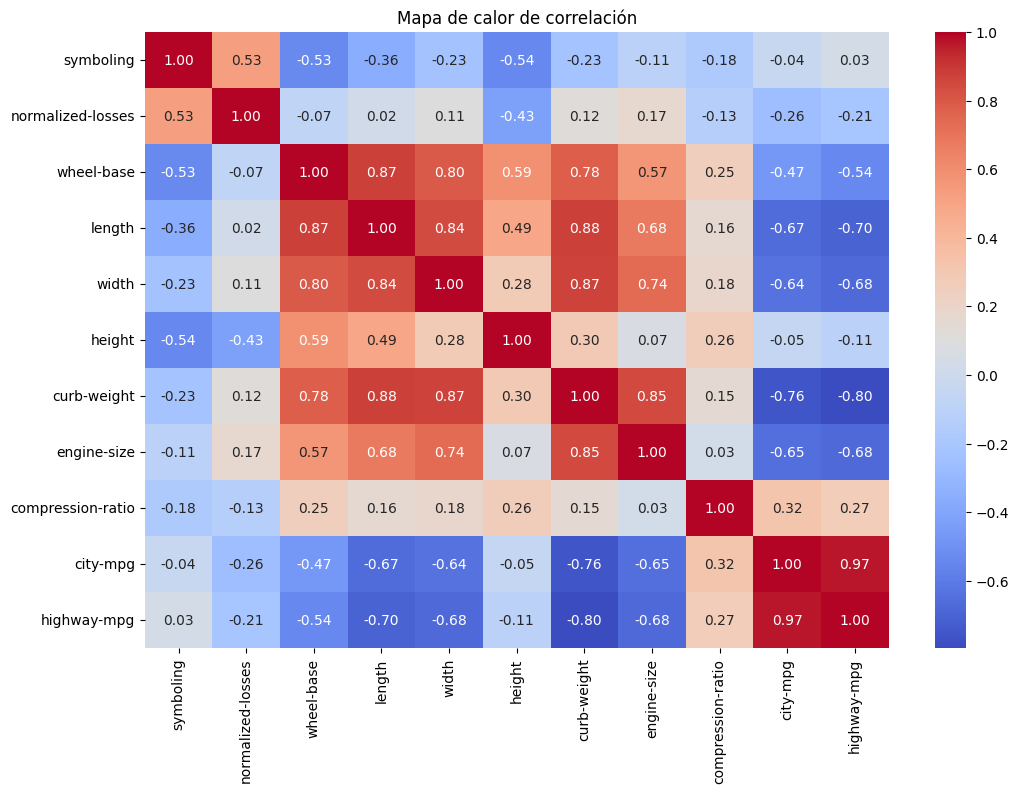

In [8]:
correlacion = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlación")
plt.show()

In [22]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
y.fillna(y.mean(), inplace=True)

In [23]:
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Crear un transformador para convertir las variables categóricas en variables numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Codificar las variables categóricas
    ]
)

# Aplicar el transformador al conjunto de datos
X_transformed = preprocessor.fit_transform(X)
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_transformed, y)


Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm'],
      dtype='object')


RandomForestRegressor(random_state=42)

In [32]:
# Convertir la matriz dispersa a densa (array denso)
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Escalar las características
X_train_scaled = scaler.fit_transform(X_train_dense)
X_test_scaled = scaler.transform(X_test_dense)



In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Crear el modelo de regresión lineal
model_lr = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model_lr.fit(X_train_scaled, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred_lr = model_lr.predict(X_test_scaled)

# Evaluación del rendimiento

# Calcular el Error Cuadrático Medio (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Calcular el Coeficiente de Determinación R²
r2_lr = r2_score(y_test, y_pred_lr)

# Mostrar los resultados
print(f"Error Cuadrático Medio (MSE) de la Regresión Lineal: {mse_lr}")
print(f"Coeficiente de Determinación R² de la Regresión Lineal: {r2_lr}")



Error Cuadrático Medio (MSE) de la Regresión Lineal: 1.9085268083667365e+34
Coeficiente de Determinación R² de la Regresión Lineal: -2.4477055300230484e+26


In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Entrenamiento del modelo KNN
knn_model = KNeighborsRegressor(n_neighbors=5)  # Puedes ajustar el número de vecinos según sea necesario
knn_model.fit(X_train_scaled, y_train)

# 2. Realizar predicciones con el conjunto de prueba
y_pred_knn = knn_model.predict(X_test_scaled)

# 3. Evaluar el rendimiento (MSE y R²)
# Calcular el Error Cuadrático Medio (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calcular el Coeficiente de Determinación R²
r2_knn = r2_score(y_test, y_pred_knn)

# Mostrar los resultados
print(f"Error Cuadrático Medio (MSE) de KNN: {mse_knn}")
print(f"Coeficiente de Determinación R² de KNN: {r2_knn}")


Error Cuadrático Medio (MSE) de KNN: 59806531.28804217
Coeficiente de Determinación R² de KNN: 0.23297500080434974


In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Crear el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42)
# Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train_scaled, y_train)
# Realizar predicciones sobre el conjunto de prueba
y_pred_tree = tree_model.predict(X_test_scaled)


In [40]:
# Calcular el Error Cuadrático Medio (MSE)
mse_tree = mean_squared_error(y_test, y_pred_tree)

# Calcular el Coeficiente de Determinación (R²)
r2_tree = r2_score(y_test, y_pred_tree)

# Mostrar los resultados
print(f"Error Cuadrático Medio (MSE) de Árbol de Decisión: {mse_tree}")
print(f"Coeficiente de Determinación R² de Árbol de Decisión: {r2_tree}")


Error Cuadrático Medio (MSE) de Árbol de Decisión: 9273143.736059116
Coeficiente de Determinación R² de Árbol de Decisión: 0.8810709647674546
